##### Assignment: Sales dataset → total revenue, top product


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# load the dataframe
df = pd.read_csv('sales_data.csv',index_col='id')

In [15]:
df.head()
df.shape
df.describe()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1000 non-null   object 
 1   product_subcategory  1000 non-null   object 
 2   product              1000 non-null   object 
 3   quantity             1000 non-null   int64  
 4   price                1000 non-null   float64
 5   purchase_date        1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


##### Q1. The total Revenue


In [17]:
# create a custom column revenue
df['revenue'] = df['price'] * df['quantity']

In [20]:
total_revenue = df['revenue'].sum()
total_revenue
print(f"The total revenue is ${total_revenue:,}")

The total revenue is $173,170.93


##### Q2. The top product


In [24]:
df[['product','revenue']].nlargest(5,'revenue')

,product,revenue
id,,
407,Robot Vacuum Cleaner,2999.90
994,Digital Camera,2399.92
449,Foldable Electric Scooter,2099.94
68,Digital Camera,2099.93
900,Arcade Game Machine,2099.93


##### Q3. The distribution of categories


In [30]:
df['product_subcategory'].value_counts().head(20)


product_subcategory
Healthy Snacks                       18
Breads                               15
Camping Equipment                    14
Small Appliances                     14
Cooking Appliances                   12
Bedding & Linens                     12
Home Organization                    12
Frozen Meals                         11
Lighting & Lamps                     11
Mixes                                11
Outdoor Accessories                  11
Mobile Accessories                   11
Travel Accessories                   10
Frozen Vegetables                    10
Decorative Wall Art & Accessories    10
Cooking Tools & Utensils             10
Dips and Spreads                      9
Soups & Broths                        8
Drinkware                             8
Baking Ingredients                    8
Name: count, dtype: int64

In [35]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['year'] = df['purchase_date'].dt.year

In [37]:
revenue_by_year = df.groupby('year')['revenue'].sum()
revenue_by_year

year
2023    21343.69
2024    84287.76
2025    67539.48
Name: revenue, dtype: float64

<Axes: xlabel='year', ylabel='revenue'>

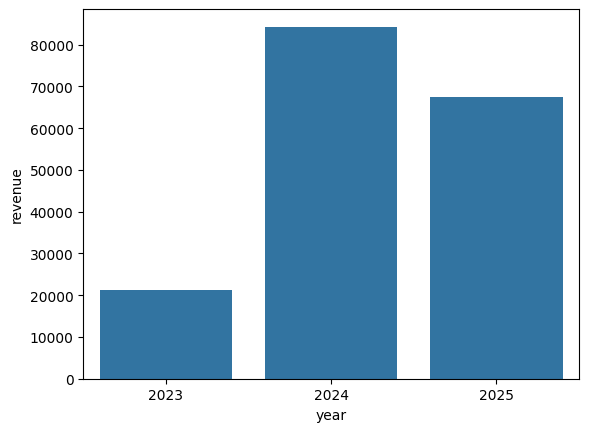

In [39]:
sns.barplot(revenue_by_year)

<Axes: xlabel='price'>

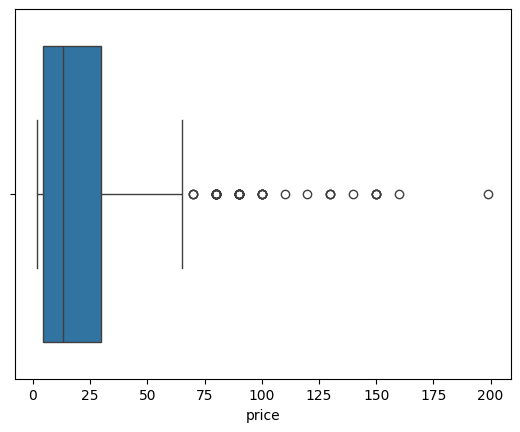

In [43]:
# filter the price to eclude bottom and bottom 2.5%
lower_bound = df['price'].quantile(0.025)
upper_bound = df['price'].quantile(0.975)
filtered_price = df[(df['price'] >= lower_bound) & (df['price']<=upper_bound)]['price']
sns.boxplot(x = filtered_price ,orient='h')

In [60]:
# the distribution by month
df['year_month'] = df['purchase_date'].dt.strftime('%Y-%b')
df['month_num'] =df['purchase_date'].dt.month
df.head()

,category,product_subcategory,product,quantity,price,purchase_date,revenue,year_month,month_num
id,,,,,,,,,
1,Automotive,Car Cleaning,Car Vacuum,9,49.99,2023-10-10,449.91,2023-Oct,10
2,Food - Spices,Salt & Seasoning,Himalayan Salt Grinder,10,4.99,2024-05-14,49.90,2024-May,5
3,Food - Health/Protein,Protein Supplements,Vanilla Protein Powder,9,24.99,2023-10-11,224.91,2023-Oct,10
4,Food - Canned Goods,Canned Vegetables,Diced Tomatoes (canned),5,1.49,2025-06-22,7.45,2025-Jun,6
5,Food - Condiments,Plant-Based Condiments,Vegan Mayonnaise,3,4.49,2024-05-20,13.47,2024-May,5


In [70]:
monthly =df.groupby('year_month')['revenue'].sum().reset_index()

# temporary column to convert the year_month to datetime
monthly['year_month_dt'] = pd.to_datetime(monthly['year_month'],format='%Y-%b')
# sort now by the datetime
monthly = monthly.sort_values('year_month_dt').drop(columns='year_month_dt')
monthly

,year_month,revenue
2,2023-Oct,7463.10
1,2023-Nov,7348.97
0,2023-Dec,6531.62
7,2024-Jan,6883.97
6,2024-Feb,8410.74
10,2024-Mar,7989.56
3,2024-Apr,9675.77
11,2024-May,6657.33
9,2024-Jun,6245.05
8,2024-Jul,6136.09


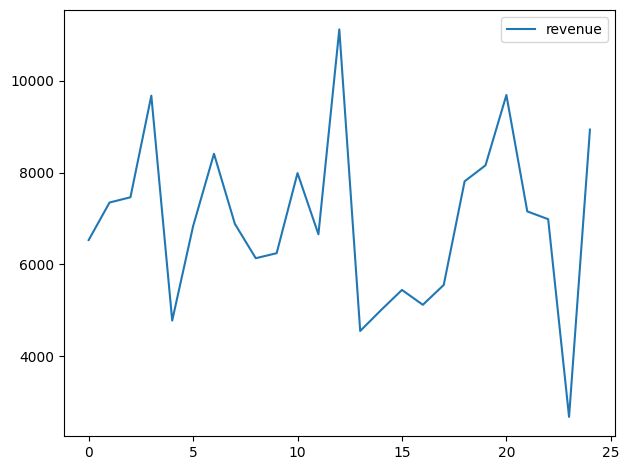

In [73]:
sns.lineplot(monthly)
plt.tight_layout()
plt.show()